# Games Analysis

This project was completed during Yandex.Practicum Data Scientist professional program.

**Key words**: testing hypotheses, games.

**Libraries used**: pandas, plotly, seaborn, scipy, matplotlib

## Table of contents

- [Project's goal](#goal)
- [Open the data file and study the general information](#general)
- [Data preparation](#dp)
- [Data Analysis](#da)
- [User profile by region](#profile)
- [Test the hypotheses](#hypotheses)
- [Conclusion](#conclusion)

## Project's goal<a id='goal'></a>

We work for the online store Ice, which **sells video games** all over the world. 
We need to **identify patterns** that determine whether a **game succeeds or not**. This will allow to **spot potential big winners** and **plan advertising campaigns**.

## Open the data file and study the general information<a id='general'></a>


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Data need to be prepared before further analysis.  
We have null values in few columns. We have to convert column 'year of release' to date or string (for better view). And Ratings columns to float

## Data preparation<a id='dp'></a>

We are going to:
- Rename the columns
- Change data types
- Check for missing values

### Replace the column names (make them lowercase).


In [5]:
df.columns = df.columns.str.lower()

### Convert the data to the required types.

#### Year of release

In [6]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

For now i dont think we have to convert to 'datetime' type, and use 'int'. It allows to filter and sort data by year

In [7]:
df['year_of_release'] = df['year_of_release'].fillna(-1)

In [8]:
df['year_of_release'] = df['year_of_release'].astype('int')

#### Rating

In [9]:
df['rating'] = df['rating'].fillna('Unknown')

#### User score

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

There is 'nan' and 'tbd' values

In [11]:
df.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,-1,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [12]:
len(df.query('user_score == "tbd"'))

2424

I see no pattern in 'tbd' values. so we consider them as 'NaN'.

In [13]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [14]:
df['user_score'] = df['user_score'].fillna('-1')

In [15]:
len(df.query('user_score == -1')) / len(df)

0.0

###### I dont wanna replace with median or mean, because it could be very wrong. Games without user score could be very unpopular or rare and probably with lower score. Also there is more than 50% games with no user score, so replace such huge part of data seems inappropriate
###### Lets examine possible reasons for 'nan' user score

In [16]:
df['user_score'] = df['user_score'].astype('float')

In [17]:
df.query('user_score == -1').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,Unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,Unknown
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1.0,Unknown


In [18]:
df.query('platform == "GEN"')['user_score'].value_counts()

-1.0    29
Name: user_score, dtype: int64

It looks like for old platforms no user scores at all

In [19]:
df.query('user_score != -1')['year_of_release'].min()

-1

In [20]:
df.query('user_score == -1')['year_of_release'].min()

-1

And for games before 1985

In [21]:
ex_platform = ['NES','GB','DS','SNES','N64','GEN']

Lets examine data without old platforms

In [22]:
df.query('platform not in @ex_platform and user_score == -1').head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,NaN,-1.0,Unknown
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-1.0,Unknown
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,-1.0,Unknown
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,-1.0,Unknown
58,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,4.34,2.65,3.15,0.35,NaN,-1.0,Unknown
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,-1.0,Unknown
86,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,NaN,-1.0,Unknown
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,-1.0,Unknown
89,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.00,0.08,NaN,-1.0,Unknown
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,3.78,2.17,1.31,0.31,NaN,-1.0,Unknown


In [23]:
df.query('name == "Call of Duty: Black Ops 3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-1.0,Unknown
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,-1.0,Unknown
1049,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,NaN,-1.0,Unknown
1062,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,NaN,-1.0,Unknown
6463,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,NaN,-1.0,Unknown


May be multiplatform games have no score? 

In [24]:
multiplatform = df.query('platform not in @ex_platform and user_score == -1').groupby('name')['user_score'].agg(['max','count'])

In [25]:
multiplatform = multiplatform.query('count > 1')

In [26]:
multiplatform['max'].value_counts()

-1.0    734
Name: max, dtype: int64

Yep, for some reasons multiplatform games have no user score, critic score and rating. We should contact to co-workers and fill that gap

In [27]:
multiplatform = multiplatform.reset_index()

In [28]:
mp_games = multiplatform['name']

Lets see one more time without old platforms and multiplatform games

In [29]:
df.query('platform not in @ex_platform and user_score == -1 and name not in @mp_games').tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.0,NaN,-1.0,T
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.0,NaN,-1.0,Unknown
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,NaN,-1.0,Unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,-1.0,Unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,-1.0,Unknown


In [30]:
df.query('na_sales == 0 and eu_sales == 0 and jp_sales != 0 and user_score == -1')['user_score'].count()

3294

It also happens when game sales only in Japan. 3294 games without user score

**Possible reasons for the lack of user score:**   
 - multiplatfom games
 - games published only in Japan
 - platforms - NES, GB,DS
 - year of release before 1985

#### Total sale

In [31]:
df['total_sale'] = df['na_sales'] + df['eu_sales'] +  df['jp_sales'] + df['other_sales']

In [32]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,Unknown,40.24


Seems ok

#### Conclusion
1) We converted column 'year of release' to 'string' from 'float' for easier further analysis  
2) Column 'user_score' to 'float' from 'string' for numerical analysis  
3) We find out all reasons for lack of user scores. But i did not replace 'nan' values because it is almost half of data, and it could have bad influence on result
4) Same for 'rating', finding out most common values and filling 'nan' with them seems not right  


## Data Analysis<a id='da'></a>

### How many games were released in different years

In [33]:
game_by_year = df.groupby('year_of_release')['name'].agg('count').reset_index()

In [34]:
game_by_year

,year_of_release,name
0,-1,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


In [35]:
game_by_year.describe()

,year_of_release,name
count,38.000000,38.000000
mean,1945.394737,439.815789
std,324.456347,446.367916
min,-1.000000,9.000000
25%,1988.250000,37.250000
50%,1997.500000,313.500000
75%,2006.750000,734.750000
max,2016.000000,1427.000000


In [36]:
game_by_year[game_by_year['name'] > 100].count()

year_of_release    24
name               24
dtype: int64

#### Conclusion
Considering multi-platform games as an independent project.  
We will consider significant periods of the year with more than one hundred - 24 years

### Platform analysis

In [37]:
by_platform = df.groupby('platform')['total_sale'].sum().sort_values().reset_index()

In [38]:
by_platform

,platform,total_sale
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,30.77
9,SAT,33.59


In [39]:
by_platform.describe()

,total_sale
count,31.000000
mean,287.603548
std,348.160256
min,0.030000
25%,23.360000
50%,200.040000
75%,304.095000
max,1255.770000


For farther analysis we will consider top platform as platform with sales greater than 305 + XOne as one of current generation platform + PC as most long living

In [40]:
top_platform = by_platform.query('total_sale >= 305 or platform == "XOne"')['platform'].reset_index(drop=True)

In [41]:
top_platform

0    XOne
1     PS4
2     GBA
3      PS
4      DS
5     Wii
6     PS3
7    X360
8     PS2
Name: platform, dtype: object

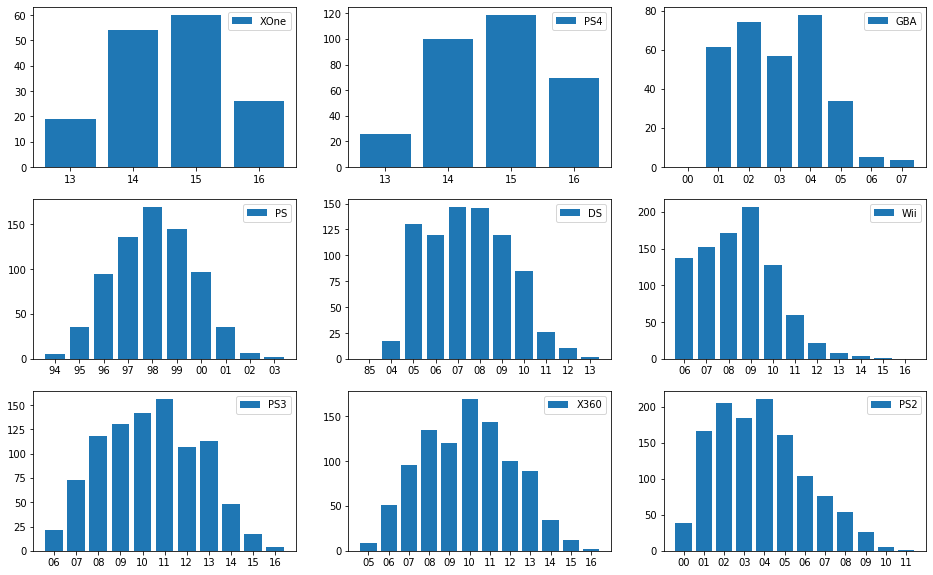

In [42]:
fig, axs = plt.subplots(3, 3, figsize=(16, 10))
i,j = 0,0
for platform in top_platform:
    df_platform = df.query('platform == @platform').groupby('year_of_release')['total_sale'].sum().reset_index()
    df_platform= df_platform[df_platform['year_of_release'] != -1].copy()
    df_platform['year_of_release'] = df_platform['year_of_release'].astype('str')
    df_platform['year_of_release'] = df_platform['year_of_release'].str.slice(start = 2)
    axs[i,j].bar(df_platform['year_of_release'],height=df_platform['total_sale'],label = platform)                                             
    title = platform + ' sales by years'
    axs[i,j].legend()
    
    if j == 2:
        i += 1 
        j = 0
    else:
       j += 1 

From graphs we can set a list of fading platforms

In [43]:
dying_platform = {'GBA','PS','PS2','DS','Wii','X360'}

In [44]:
df.query('platform in @dying_platform and year_of_release != -1').groupby('platform')['year_of_release'].agg('nunique').describe()

count     6.000000
mean     10.666667
std       1.505545
min       8.000000
25%      10.250000
50%      11.000000
75%      11.750000
max      12.000000
Name: year_of_release, dtype: float64

The average life cycle of game platform - 10 years. From first sale until last

#### Conclusion
We highlighted platforms with maximum total sales - PS4, GBA, PS, DS, Wii, PS3, X360, PS2   
Platforms that used to be popular but now have zero sales - GBA, PS, PS2, DS. Almost zero - Wii, X360  
The average life cycle of game platform - 10 years. From first sale until last

### Data period for analysis

Given the average platform life cycle of 10 years, I think we will have enough data for the last 7 years. This way we will capture the already dying platforms

### Filtering data by period

In [45]:
freshd = df.query('year_of_release >= 2009').copy()

In [46]:
len(freshd)/len(df)

0.40101705055339515

In [47]:
(df['year_of_release'] >= 2009).mean()

0.40101705055339515

We have cutted more than half data

### Platfroms. Pt 2

In [48]:
freshd.groupby('platform')['total_sale'].sum().sort_values()

platform
PS2      32.49
PSV      53.81
WiiU     82.19
PSP     101.83
PC      138.87
XOne    159.32
DS      243.29
3DS     257.81
PS4     314.14
Wii     429.94
X360    670.70
PS3     718.67
Name: total_sale, dtype: float64

In [49]:
pivot = freshd.query('total_sale > 1').pivot_table(index = 'year_of_release',columns = 'platform',values = 'total_sale',aggfunc='sum').fillna(0)

In [50]:
pivot

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2009,0.00,53.67,9.09,7.68,83.76,0.00,10.26,0.00,130.68,0.00,77.11,0.00
2010,0.00,35.72,14.25,0.00,96.71,0.00,10.18,0.00,73.46,0.00,129.21,0.00
2011,40.71,6.41,14.27,0.00,107.98,0.00,0.00,1.54,30.88,0.00,103.43,0.00
2012,31.21,9.08,11.94,0.00,67.91,0.00,0.00,6.16,13.79,10.66,71.45,0.00
2013,43.36,0.00,4.45,0.00,83.61,22.74,0.00,0.00,7.33,12.32,70.35,14.55
2014,32.29,0.00,4.24,0.00,25.14,83.36,0.00,1.96,2.01,15.91,19.84,39.11
2015,15.03,0.00,2.45,0.00,4.39,92.38,0.00,0.00,0.00,10.53,3.27,46.01
2016,8.47,0.00,0.00,0.00,0.00,45.13,0.00,0.00,0.00,2.04,0.00,15.23


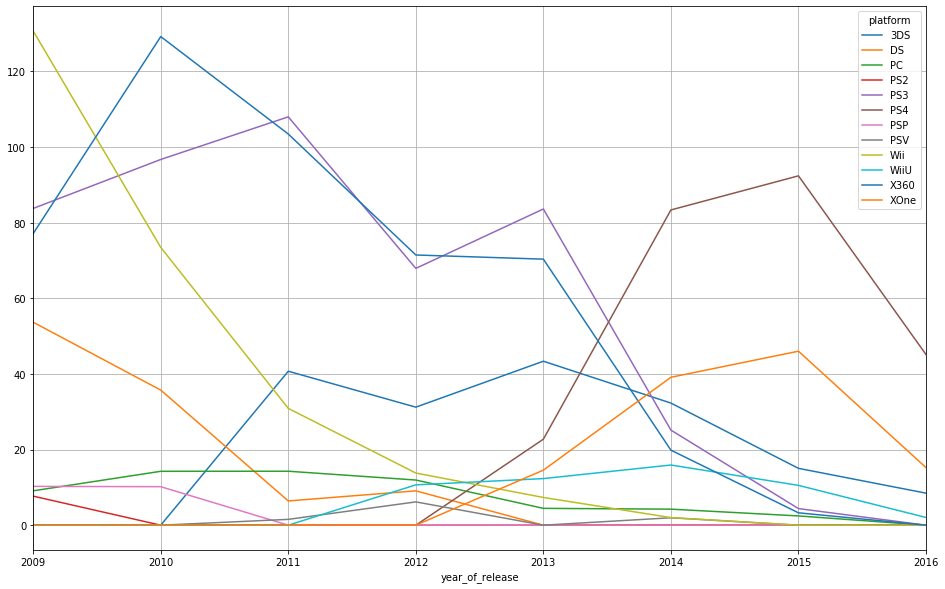

In [51]:
pivot.plot(figsize=(16,10), grid = True);

#### Conclusion
Top selling platform for analyzing period - PS3, X360, Wii. But their sales over the past two years tend to zero. Like everyone else, except PS4, XONE, 3DS and WII U.
So, at the moment, most profitable platforms (in descending order) - PS4, X One.

### Boxplot games

In [52]:
pivot_game = freshd.pivot_table(index = 'name',columns = 'platform',values = 'total_sale')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


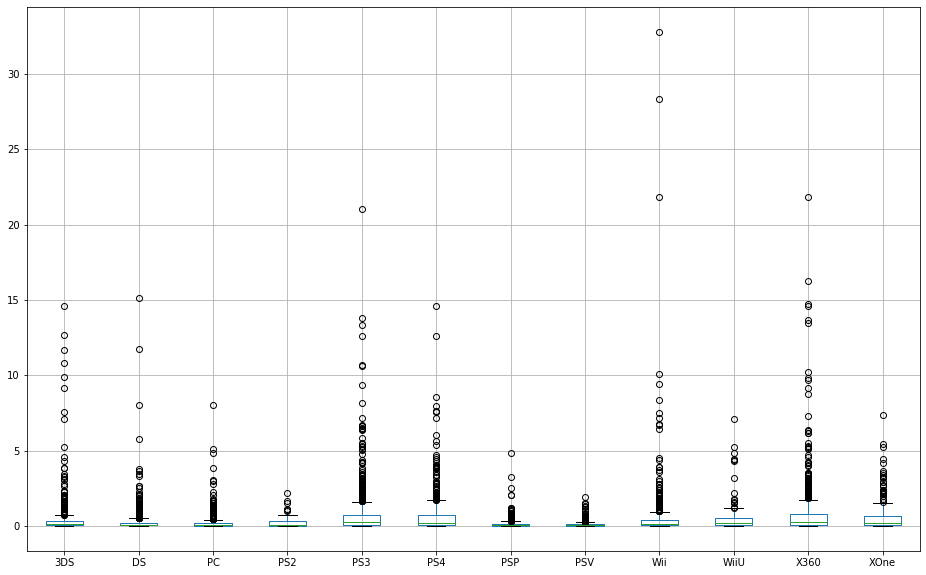

In [53]:
pivot_game.plot.box(figsize=(16,10),grid = True);

In [54]:
freshd.pivot_table(index = 'platform',values = 'total_sale',aggfunc=['median','mean'])

,median,mean
,total_sale,total_sale
platform,,
3DS,0.12,0.503535
DS,0.10,0.267352
PC,0.06,0.236980
PS2,0.10,0.230426
PS3,0.25,0.683796
PS4,0.20,0.801378
PSP,0.06,0.154054
PSV,0.05,0.125431


#### Conclusion
We see that on all platforms sales are skew to the right. Which means what on almost every platform is few games with huge sales  
The best average sales on the platforms are Ps4, X360, XONE and PS3. It makes sense, there aren’t many games on these platforms, among which there are many bestsellers


### User and proffesional score

For evaluating impact of critic or user scores we going to use PS3 platform, which have many bestsellers

In [55]:
ps3 = freshd.query('platform == "PS3"')

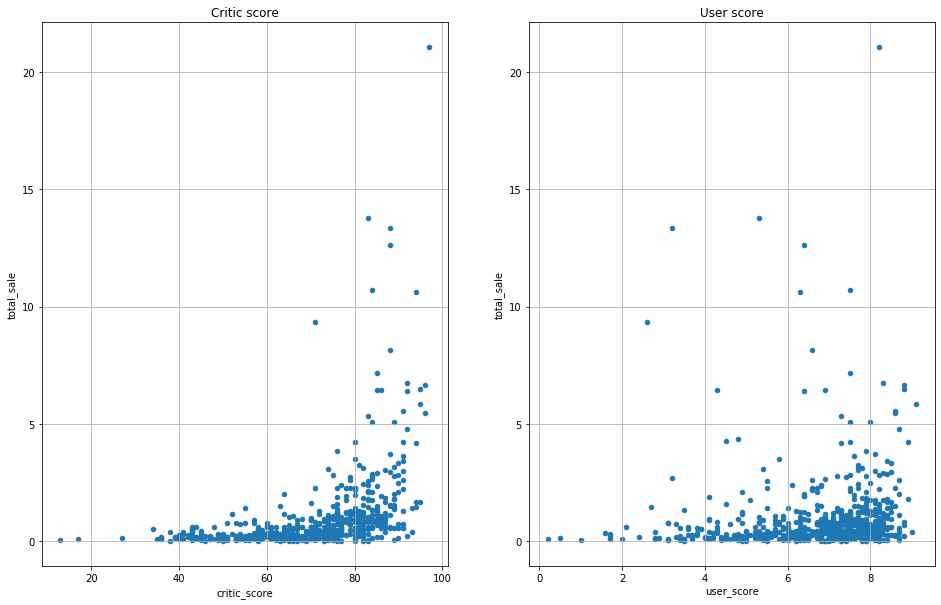

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ps3.plot.scatter(ax=axes[0], x='critic_score',y='total_sale',figsize=(16,10),grid = True,title = 'Critic score');
ps3.query('user_score != -1').plot.scatter(ax=axes[1], x='user_score',y='total_sale',figsize=(16,10),grid = True,title = 'User score');

In [57]:
ps3.query('user_score != -1')[['total_sale','user_score','critic_score']].corr()

,total_sale,user_score,critic_score
total_sale,1.000000,0.095400,0.411372
user_score,0.095400,1.000000,0.634093
critic_score,0.411372,0.634093,1.000000


#### Conclusion
As we can see from the graphs and correlation table - critic score is more important for game sales

### Multiplatform game

In [58]:
wide_top_platform = pd.Series(['PC','XOne'])

In [59]:
wide_top_platform = wide_top_platform.append(top_platform).reset_index(drop=True)

I have added two platform: PC - as most long living, and XONE - as newest to compare with PS4

In [60]:
mp_games

0                                      11eyes: CrossOver
1      2 in 1 Combo Pack: Sonic Heroes / Super Monkey...
2                      3rd Super Robot Wars Z Jigoku Hen
3                    3rd Super Robot Wars Z: Tengoku-Hen
4                           428: Fuusa Sareta Shibuya de
                             ...                        
729                                     Yourself Fitness
730                          Zapper: One Wicked Cricket!
731                           Zatch Bell! Mamodo Battles
732                                               ZombiU
733                                    Zoo Tycoon (2013)
Name: name, Length: 734, dtype: object

In [61]:
sales_by_platform = freshd.query('name in @mp_games and platform in @wide_top_platform').pivot_table(index ='name',columns ='platform',values='total_sale')

In [62]:
sales_by_platform.median().sort_values()

platform
PC      0.050
PS3     0.120
XOne    0.125
X360    0.140
PS2     0.145
PS4     0.155
Wii     0.170
DS      0.190
dtype: float64

This analysis makes sense only for platforms of the same generation and type (portable, stationary).  
It seems what in newest platform best sales have PS4. In previouse generation - Wii.  
Lets take a look to the one example

In [63]:
freshd.query('name == "Call of Duty: Black Ops 3"').sort_values(by='total_sale',ascending = False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-1.0,Unknown,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,-1.0,Unknown,7.39
1049,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,NaN,-1.0,Unknown,1.70
1062,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,NaN,-1.0,Unknown,1.69
6463,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,NaN,-1.0,Unknown,0.26


We have all data for 2015 year, so its clear what PS4 sales twice higher XOne. Not mentioning PC

#### Conclusion
In current generation - best platform for maximizing sales - PS4.

### Genres

In [64]:
freshd.groupby('genre')['total_sale'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Adventure,703.0,0.115548,0.265578,0.01,0.02,0.040,0.1000,3.17
Strategy,234.0,0.205684,0.437509,0.01,0.02,0.070,0.2200,4.83
Puzzle,193.0,0.209275,0.401848,0.01,0.03,0.080,0.1800,2.67
Simulation,340.0,0.307853,0.818713,0.01,0.04,0.110,0.2600,9.17
Misc,782.0,0.396893,1.181959,0.01,0.06,0.135,0.3300,21.82
Fighting,252.0,0.450357,0.769385,0.01,0.07,0.190,0.5150,7.55
Action,1767.0,0.458846,1.086354,0.01,0.05,0.160,0.4300,21.05
Racing,321.0,0.487134,1.165662,0.01,0.06,0.170,0.4700,12.65
Role-Playing,671.0,0.540373,1.325647,0.01,0.06,0.150,0.4400,15.13


#### Conclusion
Shoother, platform, sports - genre with highest sales  
Adventure, Strategy, Puzzle - lowest

## Create a Data Analysis for each region<a id='profile'></a>

### The top five platforms

In [65]:
platform_by_region = freshd.groupby('platform')['na_sales','eu_sales','jp_sales'].sum()

In [66]:
platform_by_region['na_share'] = platform_by_region['na_sales'] / platform_by_region['na_sales'].sum()
platform_by_region['eu_share'] = platform_by_region['eu_sales'] / platform_by_region['eu_sales'].sum()
platform_by_region['jp_share'] = platform_by_region['jp_sales'] / platform_by_region['jp_sales'].sum()

#### TOP 5 North America

In [67]:
platform_by_region[['na_share','na_sales']].sort_values(by='na_sales',ascending = False).head(5)

,na_share,na_sales
platform,,
X360,0.278439,408.18
PS3,0.199119,291.90
Wii,0.160816,235.75
DS,0.082274,120.61
PS4,0.074177,108.74


#### TOP 5 Europe

In [68]:
platform_by_region[['eu_share','eu_sales']].sort_values(by='eu_sales',ascending = False).head(5)

,eu_share,eu_sales
platform,,
PS3,0.247777,255.00
X360,0.191148,196.72
PS4,0.137094,141.09
Wii,0.120702,124.22
PC,0.079988,82.32


#### TOP 5 Japan

In [69]:
platform_by_region[['jp_share','jp_sales']].sort_values(by='jp_sales',ascending = False).head(5)

,jp_share,jp_sales
platform,,
3DS,0.274147,100.62
PS3,0.186061,68.29
DS,0.141977,52.11
PSP,0.137291,50.39
Wii,0.093507,34.32


#### Conclusion
X360 most popular platform in North America region with share 28%.  
In Europe it is PS3 with share 25%. And X360 have 20%. But there is no portable consoles.  
In Japan best sales have portable 3DS. From stationary - PS3. X360 is out of top 5

### Step 4.2 Genres by region

In [70]:
genres_by_region = freshd.groupby('genre')['na_sales','eu_sales','jp_sales'].sum()

In [71]:
genres_by_region['na_share'] = genres_by_region['na_sales'] / genres_by_region['na_sales'].sum()

In [72]:
genres_by_region['eu_share'] = genres_by_region['eu_sales'] / genres_by_region['eu_sales'].sum()

In [73]:
genres_by_region['jp_share'] = genres_by_region['jp_sales'] / genres_by_region['jp_sales'].sum()

#### TOP 5 North America

In [74]:
genres_by_region[['na_share','na_sales']].sort_values(by='na_sales',ascending = False).head(5)

,na_share,na_sales
genre,,
Action,0.246746,361.72
Shooter,0.188525,276.37
Sports,0.155298,227.66
Misc,0.112145,164.40
Role-Playing,0.089245,130.83


#### TOP 5 Europe

In [75]:
genres_by_region[['eu_share','eu_sales']].sort_values(by='eu_sales',ascending = False).head(5)

,eu_share,eu_sales
genre,,
Action,0.264208,271.91
Shooter,0.186853,192.30
Sports,0.154020,158.51
Misc,0.083826,86.27
Role-Playing,0.081193,83.56


#### TOP 5 Japan

In [76]:
genres_by_region[['jp_share','jp_sales']].sort_values(by='jp_sales',ascending = False).head(5)

,jp_share,jp_sales
genre,,
Role-Playing,0.328611,120.61
Action,0.229300,84.16
Misc,0.081982,30.09
Sports,0.068986,25.32
Platform,0.056262,20.65


#### Conclusion
There is almost no difference between preferable genres in NA and Europe.  
But in Japan Role-Playing games have leadership. Also 'Shooter' replaced by 'Platform' in the top.  
My guess reason of that change - portable consoles much more popular in Japan. And playing RPG and platform more convenint on portable console than shooter.

### ESRB


#### North America

In [77]:
freshd.query('rating not in ["EC","RP"] and na_sales !=0').groupby('rating')['na_sales'].agg(['sum','mean','median','count']).sort_values(by='mean',ascending = False)

,sum,mean,median,count
rating,,,,
M,440.86,0.579317,0.20,761
E,403.16,0.329379,0.12,1224
E10+,202.94,0.277240,0.13,732
Unknown,190.57,0.263947,0.10,722
T,227.11,0.247397,0.12,918


I have cutted two raitings 'EC' and 'RP' because they have very small count of games  
Also removed games without sales (possibly not released in the region) so as not to distort data

#### Europe

In [78]:
freshd.query('rating not in ["EC","RP"] and eu_sales !=0').groupby('rating')['eu_sales'].agg(['sum','mean','median','count']).sort_values(by='mean',ascending = False)

,sum,mean,median,count
rating,,,,
M,326.50,0.415394,0.16,786
E,261.50,0.292179,0.09,895
E10+,121.63,0.193063,0.10,630
Unknown,166.21,0.190827,0.06,871
T,153.28,0.176998,0.07,866


#### Japan

In [79]:
freshd.query('rating not in ["EC","RP"] and jp_sales !=0').groupby('rating')['jp_sales'].agg(['sum','mean','median','count']).sort_values(by='mean',ascending = False)

,sum,mean,median,count
rating,,,,
E,61.49,0.290047,0.060,212
E10+,20.82,0.156541,0.040,133
T,50.59,0.119598,0.060,423
Unknown,198.50,0.115407,0.040,1720
M,35.63,0.090893,0.045,392


#### Conclusion
Same as genres, Europe and North America have no differ. Games with raiting M have more sales.  
In Japan raiting M is not pupular. But Japan have more games without info about ratings.

## Test the following hypotheses<a id='hypotheses'></a>

### Hypothese about user score and platform

H0 = User ratings of the Xbox One and PC platforms on average are the same.  
H1 = User ratings of the Xbox One and PC platforms on average are not the same.

In [80]:
alpha = 0.05

For this kind of analyze i think 0.05 is enough threshold

In [81]:
filtered_data = freshd.query('platform in ["PC","XOne"] and user_score != -1')  

In [82]:
filtered_data.groupby('platform')['user_score'].agg(['mean','median','std','var','count'])

,mean,median,std,var,count
platform,,,,,
PC,6.652079,7.0,1.552488,2.410220,457
XOne,6.521429,6.8,1.380941,1.906997,182


In [83]:
quantity = filtered_data.query('platform == "XOne"')['name'].count()

Variance is not much different. XOne have less games, so we will limit sample by 182

In [84]:
results_by_platform = st.ttest_ind(
        filtered_data.query('platform == "PC"')['user_score'].head(quantity).values, 
        filtered_data.query('platform == "XOne"')['user_score'].values,
        equal_var = True)

In [85]:
results_by_platform.pvalue

0.2971730176878885

In [86]:
if (results_by_platform.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We can't reject the null hypothesis


#### Conclusion
There is 30% chance that user score on PC and XOne on average are the same. So we can`t reject HO hypothese

### Hypothese about user score and platform

H0 = User ratings of the Action and Sport games on average are the same.  
H1 = User ratings of the Action and Sport games on average are not the same.

In [87]:
filtered_by_genre = freshd.query('genre in ["Action","Sports"] and user_score != -1')

In [88]:
filtered_by_genre.groupby('genre')['user_score'].agg(['mean','median','std','var','count'])

,mean,median,std,var,count
genre,,,,,
Action,6.817415,7.10,1.358391,1.845226,936
Sports,6.105250,6.45,1.698015,2.883256,400


In [89]:
quantity_sports = filtered_by_genre.query('genre == "Sports"')['name'].count()

Variance is more different than it was in platform. Sports have less games, so we will limit sample by 400

In [90]:
results_by_genre = st.ttest_ind(
        filtered_by_genre.query('genre == "Sports"')['user_score'].head(quantity_sports).values, 
        filtered_by_genre.query('genre == "Action"')['user_score'].values,
        equal_var = False)

In [91]:
results_by_genre.pvalue

3.493323839142059e-13

In [92]:
if (results_by_genre.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


#### Conclusion
There is very small chance that user score Sport and Action games on average are the same. It looks like Action games have better score than Sports games.

## General conclusion<a id='conclusion'></a>

After analyzing data i would recommend focus only on two platform - PS4 and Xbox One. PS4 has more positive dynamics of sales, multi platform sales better than XBox One. Both this platform in the middle of lifecycle, so 2017-2018 probably will have highest sales.
If our main customers are in Europe or America, we should focus on advertising action games or shooters. Preferred rated Mature.

If we working on Japan market we should consider promoting games on portative consoles, like 3DS and change genre to RPG with lower age rating

A good idea would be to work more closely with gaming publications to improve the rating of professional critics. Sales showed a fairly strong correlation with their scores.

For more accurate analysis we should also get missing information about user scores